# Sepsis Prediction


### Group Members

#### Raj Rajeshwari Bajre           23PGAI0093
#### Yogita Patel                          23PGAI0091
#### Avinash Goen                       23PGAI0036
#### Mayank Gupta                      23PGAI0094

# Importing Libraries

In [1]:
import pandas as pd
import math
import numpy as np
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

%matplotlib inline
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:20,.2f}'.format

# Reading Raw Data

In [75]:
df = pd.read_csv("/content/drive/MyDrive/training_set.csv")
df.head()

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0,1
1,1,97.00,95.00,NaN,98.00,75.33,NaN,19.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0,1
2,2,89.00,99.00,NaN,122.00,86.00,NaN,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0,1
3,3,90.00,95.00,NaN,NaN,NaN,NaN,30.00,NaN,24.00,NaN,NaN,7.36,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0,1
4,4,103.00,88.50,NaN,122.00,91.33,NaN,24.50,NaN,NaN,NaN,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0,1


# Exploratory Data Analysis

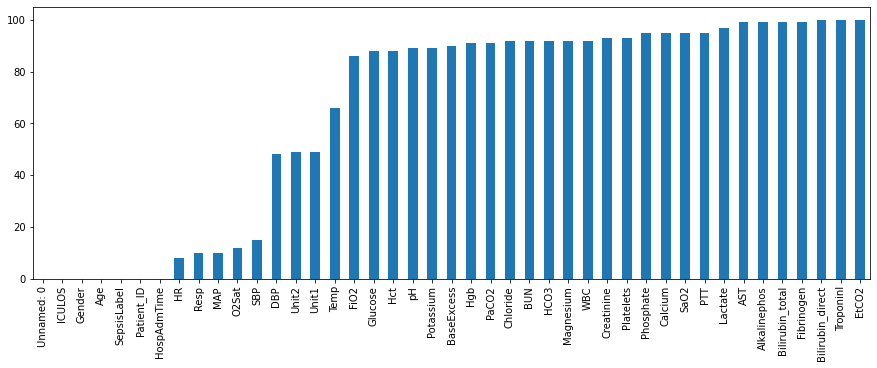

In [76]:
round((df.isna().sum().sort_values()/len(df)*100)).plot.bar(figsize=(15,5))

In [77]:
df.isnull().sum()

Unnamed: 0               0
HR                   61189
O2Sat                95079
Temp                523314
SBP                 120201
MAP                  80858
DBP                 380297
Resp                 77258
EtCO2               790215
BaseExcess          707834
HCO3                726598
FiO2                678060
pH                  699600
PaCO2               720927
SaO2                751055
AST                 778395
BUN                 725739
Alkalinephos        778683
Calcium             750897
Chloride            724438
Creatinine          737728
Bilirubin_direct    789033
Glucose             693559
Lactate             763072
Magnesium           728734
Phosphate           750319
Potassium           704379
Bilirubin_total     780522
TroponinI           789250
Hct                 697157
Hgb                 720394
PTT                 751909
WBC                 730867
Fibrinogen          784185
Platelets           738716
Age                      0
Gender                   0
U

In [78]:
df.describe()

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
count,"790,215.00","729,026.00","695,136.00","266,901.00","670,014.00","709,357.00","409,918.00","712,957.00",0.00,"82,381.00","63,617.00","112,155.00","90,615.00","69,288.00","39,160.00","11,820.00","64,476.00","11,532.00","39,318.00","65,777.00","52,487.00","1,182.00","96,656.00","27,143.00","61,481.00","39,896.00","85,836.00","9,693.00",965.00,"93,058.00","69,821.00","38,306.00","59,348.00","6,030.00","51,499.00","790,215.00","790,215.00","404,050.00","404,050.00","790,207.00","790,215.00","790,215.00","790,215.00"
mean,"395,107.00",84.99,97.27,37.03,120.96,78.77,59.99,18.77,NaN,-0.65,24.09,0.53,7.38,41.17,91.22,356.21,24.35,114.20,8.32,105.77,1.40,3.11,133.61,2.47,2.04,3.59,4.16,2.69,9.29,30.67,10.58,40.78,11.94,292.25,199.62,63.02,0.58,0.51,0.49,-52.03,27.20,0.02,"10,192.65"
std,"228,115.57",16.94,2.91,0.78,21.52,15.04,12.57,5.40,NaN,4.29,4.40,0.19,0.07,9.00,12.23,"1,025.65",20.15,147.36,0.82,5.94,1.53,4.63,51.58,2.33,0.39,1.45,0.63,5.24,11.41,4.87,1.75,23.96,7.56,158.63,109.24,16.13,0.49,0.50,0.50,155.86,28.19,0.15,"5,893.67"
min,0.00,20.00,20.00,20.90,22.00,20.00,20.00,1.00,NaN,-32.00,0.00,0.00,6.62,10.00,24.00,3.00,1.00,7.00,1.60,26.00,0.10,0.10,10.00,0.20,0.20,0.20,1.00,0.10,0.30,5.50,2.20,12.50,0.10,34.00,5.00,18.11,0.00,0.00,0.00,"-3,710.66",1.00,0.00,1.00
25%,"197,553.50",73.00,96.00,36.56,105.00,68.00,51.00,15.00,NaN,-3.00,22.00,0.40,7.34,36.00,93.00,28.00,12.00,56.00,7.80,102.00,0.70,0.50,104.00,1.20,1.80,2.70,3.80,0.50,1.00,27.40,9.40,27.70,8.00,184.00,127.00,52.74,0.00,0.00,0.00,-38.09,11.00,0.00,"5,074.00"
50%,"395,107.00",84.00,98.00,37.06,118.50,77.00,58.50,18.00,NaN,0.00,24.00,0.50,7.39,40.00,97.00,57.00,18.00,78.00,8.30,106.00,0.90,1.40,124.00,1.80,2.00,3.40,4.10,0.90,4.30,30.20,10.40,32.40,10.80,250.00,181.00,65.25,1.00,1.00,0.00,-2.60,21.00,0.00,"10,174.00"
75%,"592,660.50",96.00,99.50,37.55,134.00,87.33,67.00,22.00,NaN,1.00,27.00,0.55,7.43,45.00,98.00,180.00,29.00,119.00,8.80,109.00,1.40,3.70,150.00,2.80,2.20,4.20,4.50,2.20,12.90,33.50,11.60,42.90,14.30,356.75,247.00,75.89,1.00,1.00,1.00,-0.02,35.00,0.00,"15,284.00"
max,"790,214.00",280.00,100.00,42.22,281.00,300.00,298.00,69.00,NaN,100.00,55.00,10.00,7.93,100.00,100.00,"9,890.00",266.00,"3,833.00",22.00,145.00,46.60,37.50,988.00,31.00,9.70,18.80,27.50,46.60,49.30,71.70,32.00,150.00,422.90,"1,760.00","1,783.00",89.00,1.00,1.00,1.00,23.99,336.00,1.00,"20,643.00"


In [79]:
df.corr()

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
Unnamed: 0,1.00,-0.00,-0.00,-0.01,0.01,0.01,0.01,-0.00,NaN,0.01,-0.01,-0.01,0.02,-0.02,0.01,-0.00,0.02,0.02,0.02,-0.01,0.01,0.12,-0.00,-0.01,0.02,-0.00,-0.01,0.06,-0.06,-0.00,-0.00,-0.00,-0.00,0.02,-0.00,0.00,0.00,0.00,-0.00,-0.03,0.01,0.00,1.00
HR,-0.00,1.00,-0.08,0.26,-0.03,0.11,0.19,0.25,NaN,-0.09,-0.09,0.08,-0.10,0.03,-0.02,0.06,-0.06,0.05,-0.09,0.02,-0.03,-0.03,0.06,0.16,-0.08,-0.05,0.01,0.01,0.03,-0.05,-0.05,0.01,0.12,0.06,0.03,-0.19,-0.03,0.06,-0.06,-0.05,0.03,0.05,-0.00
O2Sat,-0.00,-0.08,1.00,-0.03,0.04,0.05,0.04,-0.16,NaN,0.03,-0.06,-0.17,0.11,-0.11,0.08,-0.02,-0.06,-0.02,-0.03,0.16,-0.04,0.01,-0.04,-0.19,-0.03,-0.06,-0.03,-0.03,0.01,-0.10,-0.08,-0.08,-0.03,-0.07,-0.02,-0.04,-0.03,-0.05,0.05,0.00,-0.05,-0.01,-0.00
Temp,-0.01,0.26,-0.03,1.00,0.01,-0.02,-0.03,0.14,NaN,0.15,0.08,-0.20,0.19,-0.05,0.03,0.02,-0.11,-0.05,-0.04,-0.05,-0.05,-0.15,-0.10,-0.20,-0.04,-0.17,0.09,-0.05,-0.00,-0.01,0.00,-0.10,0.02,0.26,0.03,-0.11,0.06,-0.16,0.16,0.04,0.10,0.04,-0.01
SBP,0.01,-0.03,0.04,0.01,1.00,0.77,0.53,0.06,NaN,0.15,0.06,-0.09,0.13,0.01,0.09,0.05,0.02,-0.02,0.13,-0.04,0.06,-0.04,0.05,-0.16,-0.06,-0.04,-0.11,0.00,-0.05,0.09,0.10,-0.11,-0.04,0.03,0.02,-0.00,-0.01,0.19,-0.19,0.04,0.09,-0.01,0.01
MAP,0.01,0.11,0.05,-0.02,0.77,1.00,0.80,0.05,NaN,0.11,0.02,-0.06,0.10,0.00,0.04,0.09,-0.06,-0.00,0.11,-0.00,0.00,-0.06,0.05,-0.10,-0.08,-0.05,-0.10,0.00,-0.04,0.17,0.18,-0.07,-0.02,0.01,0.02,-0.17,0.02,0.22,-0.22,0.04,0.05,-0.01,0.01
DBP,0.01,0.19,0.04,-0.03,0.53,0.80,1.00,0.05,NaN,0.08,0.02,-0.03,0.07,-0.00,0.02,0.11,-0.09,-0.01,0.08,0.01,-0.05,-0.04,0.06,-0.05,-0.10,-0.05,-0.11,0.04,-0.08,0.21,0.23,-0.08,-0.01,-0.01,0.03,-0.33,0.01,0.27,-0.27,0.03,0.05,0.01,0.01
Resp,-0.00,0.25,-0.16,0.14,0.06,0.05,0.05,1.00,NaN,-0.03,-0.04,0.07,0.02,-0.04,-0.02,0.02,0.07,0.08,-0.00,-0.08,0.02,-0.02,0.03,0.14,-0.00,-0.04,0.01,0.03,-0.04,0.02,0.01,0.07,0.04,0.13,0.07,0.03,0.01,0.09,-0.09,-0.04,0.12,0.06,-0.00
EtCO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BaseExcess,0.01,-0.09,0.03,0.15,0.15,0.11,0.08,-0.03,NaN,1.00,0.85,-0.13,0.65,0.36,0.05,-0.03,-0.19,-0.10,0.20,-0.32,-0.24,0.02,-0.16,-0.44,-0.00,-0.32,-0.24,0.04,0.03,-0.08,-0.05,-0.23,-0.17,0.11,0.07,-0.05,0.03,0.06,-0.06,-0.02,0.16,0.02,0.01


Feature Selection and Feature Engineering:
We remove following features on basis of high correlation and % of null values:

- EtCO2 (more than 99% null values)
- Hct (very high correlation with Hgb)
- Bilirubin_direct (high null values and good correlation with Bilirubin_total
- Troponin (Null values)
- Calcium
- Phosphate 
- PaCO2
- BaseExcess 
- DBP (captured in engineered features and MAP)
- SBP (captured in engineered features and MAP)

Feature addition based on some research papers:

- SOFA Score
- qSOFA
- BUN/Creatinine
- 6 hours sliding window capturing mean and deviation of HR, Resp, MAP, O2Sat, SBP.
- Difference from previous value for Lactate, FiO2, HR, MAP, O2Sat, SBP, Resp.


Data Imputation for null values:
We impute the null values using forward and backward fill per patient, and imputing a completely null value based column by its normal range.

## Data Imabalance

In [81]:
df.SepsisLabel.value_counts()


0    773079
1     17136
Name: SepsisLabel, dtype: int64

We tackle issue of data imabalance using downsampling by balancing the class weight, and using bagging with various classification algorithms like KNN, Decision Tree, Random Forest, SVM, LR, Naive Bayes, XGBoost.

In [82]:
X_train = df.drop("SepsisLabel",axis="columns")
Y_train = df.SepsisLabel

## Visualising the data

In [83]:
# set plots style
sns.set_theme(context="notebook", style="whitegrid", palette="tab10")

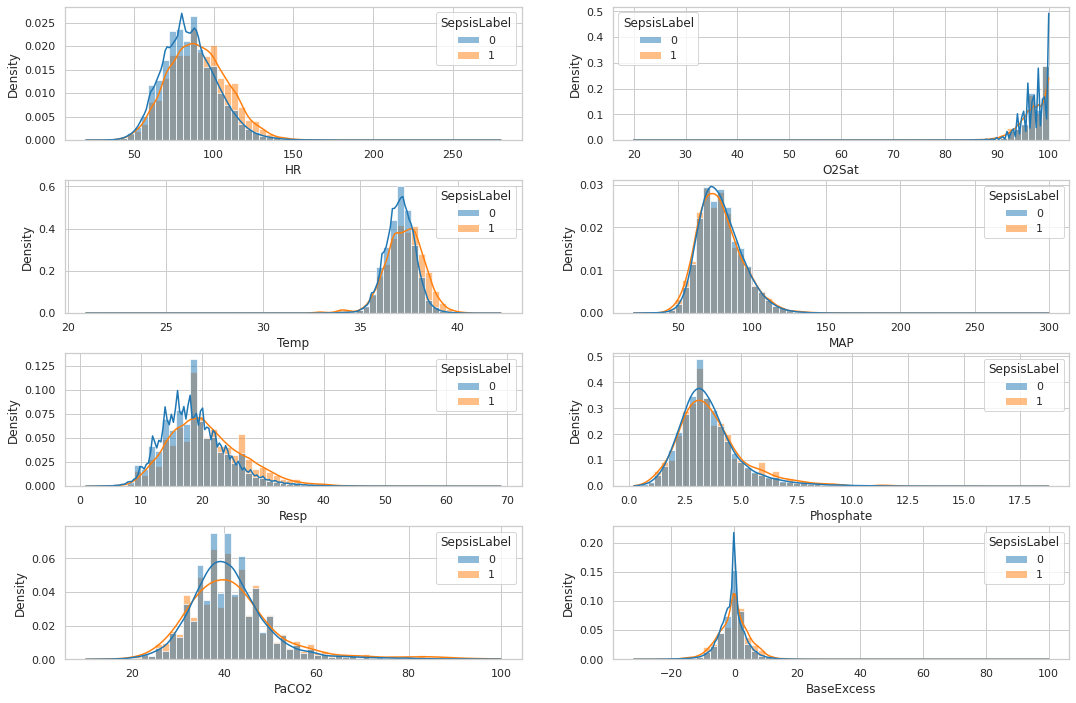

In [86]:
#X_train.columns

vital_signs = ["HR", "O2Sat", "Temp", "MAP", "Resp","Phosphate","PaCO2","BaseExcess"]

plt.figure(figsize=(18,12))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(vital_signs, 1):
    plt.subplot(4,2,i)
    sns.histplot(data=X_train, x=column, hue=Y_train, stat="density", common_norm=False, bins=60, kde=True)


# Doing Data Imputation

In [87]:
testing_df = pd.read_csv("/content/drive/MyDrive/training_set.csv")
testing_df.shape

(790215, 43)

In [88]:
training_df = pd.read_csv('/content/drive/MyDrive/training_set.csv')
training_df.shape

(790215, 43)

In [89]:
training_df.head()

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0,1
1,1,97.00,95.00,NaN,98.00,75.33,NaN,19.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0,1
2,2,89.00,99.00,NaN,122.00,86.00,NaN,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0,1
3,3,90.00,95.00,NaN,NaN,NaN,NaN,30.00,NaN,24.00,NaN,NaN,7.36,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0,1
4,4,103.00,88.50,NaN,122.00,91.33,NaN,24.50,NaN,NaN,NaN,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0,1


## Working with missing values

In [90]:
missing_values = training_df.isna().mean().sort_values(ascending=False)

In [91]:
features_to_remove_temporary = missing_values[missing_values.values > 0.15].index
print(features_to_remove_temporary)

Index(['EtCO2', 'TroponinI', 'Bilirubin_direct', 'Fibrinogen',
       'Bilirubin_total', 'Alkalinephos', 'AST', 'Lactate', 'PTT', 'SaO2',
       'Calcium', 'Phosphate', 'Platelets', 'Creatinine', 'WBC', 'Magnesium',
       'HCO3', 'BUN', 'Chloride', 'PaCO2', 'Hgb', 'BaseExcess', 'Potassium',
       'pH', 'Hct', 'Glucose', 'FiO2', 'Temp', 'Unit1', 'Unit2', 'DBP', 'SBP'],
      dtype='object')


Since MAP is derived from SBP and DBP, we can remove the dependent features

In [92]:
training_df['Unit'] = training_df.apply(lambda x: x['Unit1'] + x['Unit2'], axis=1)

In [93]:
droped_training_df = training_df.drop(['EtCO2', 'Bilirubin_direct', 'TroponinI', 'Calcium', 'Phosphate', 'PaCO2', 'Hct', 'Chloride', 'BaseExcess', 'SBP', 'DBP', 'Unit1', 'Unit2'], axis=1)

## Normal Values for Features

In [94]:
def uniform(start, stop, len_val):
    value = random.uniform(start, stop)
    return round(value, len_val)

def _handle_HR(age):
    if age > 0 and age < 0.077:
        return random.randint(120, 161)
    if age >= 0.077 and age < 1:
        return random.randint(100, 141)
    if age >= 1 and age < 12:
        return random.randint(90, 111)
    if age >= 12 and age < 18:
        return random.randint(80, 101)
    if age >= 18:
        return random.randint(60, 101)
    return random.randint(60, 80)

def _handle_SBP(age):
    if age < 18:
        return random.randint(103, 153)
    return random.randint(110, 160)

def _handle_Temp(age):
    if age > 65:
        return uniform(35.8, 36.9, 2)
    if age > 11:
        return uniform(36.4, 37.6, 2)
    return uniform(35.5, 37.5, 2)


def _handle_Resp(age):
    if age > 18:
        return random.randint(12, 21)
    if age > 12:
        return random.randint(12, 17)
    if age > 6:
        return random.randint(18, 31)
    if age > 3:
        return random.randint(22, 35)
    if age > 1:
        return random.randint(24, 41)
    return random.randint(30, 61)

def _handle_Calcium(age):
    if age > 18:
        return uniform(4.5, 5.6, 2)
    return uniform(4.2, 5.58,2)

def _handle_DBP():
    return random.randint(60, 80)

def _handle_O2Sat():
    return random.randint(95, 100)

def _handle_MAP():
    return uniform(70, 100, 2)

def _handle_EtCO2():
    return uniform(35, 45, 2)

def _handle_baseExcess():
    return uniform(-2, 2, 2)

def _handle_HCO3():
    return uniform(22, 28, 2)

def _handle_FiO2():
    return 21

def _handle_pH():
    return uniform(7.35, 7.45, 2)

def _handle_PaCO2():
    return uniform(35, 45, 2)

def _handle_SaO2():
    return uniform(94, 100, 2)

def _handle_AST():
    return uniform(8, 48, 2)

def _handle_BUN():
    return uniform(7, 22, 2)

def _handle_Alkaline():
    return uniform(44, 147, 2)

def _handle_Chloride():
    return uniform(96, 106, 2)

def _handle_cretinine():
    return uniform(0.6, 1.3, 2)

def _handle_bilirubin_direct():
    return uniform(0.2, 1.2, 2)

def _handle_Glucose():
    return random.randint(70, 110)

def _handle_lactate():
    return uniform(4.5, 19.8, 2)

def _handle_Magnesium():
        return uniform(1.581, 2.55, 2)

def _handle_phosphate():
    return uniform(2.5, 4.5, 2)

def _handle_potassium():
    return uniform(3.6, 5.2, 2)

def _handle_bilirubin_total():
    return uniform(0.3, 1.0, 2)

def _handle_troponineI():
    return uniform(0.0, 0.04, 2)

def _handle_Hct():
    return uniform(36, 51, 2)

def _handle_Hgb():
    return uniform(12, 18, 2)

def _handle_PTT():
    return uniform(60, 70, 2)

def _handle_wbc():
    return random.randint(43, 110)

def _handle_Fibrinogen():
    return uniform(200, 400, 2)

def _handle_platelets():
    return random.randint(43, 110)

def _handle_hosp_adm_time():
    return 0

range_with_age_relation = {
    'HR': _handle_HR,
    'Temp': _handle_Temp,
    'Resp': _handle_Resp,
    'Calcium': _handle_Calcium,
    'SBP': _handle_SBP
}

range_without_age = {
    'O2Sat': _handle_O2Sat,
    'MAP': _handle_MAP,
    'DBP': _handle_DBP,
    'EtCO2': _handle_EtCO2,
    'BaseExcess': _handle_baseExcess,
    'HCO3': _handle_HCO3,
    'FiO2': _handle_FiO2,
    'pH': _handle_pH,
    'PaCO2': _handle_PaCO2,
    'SaO2': _handle_SaO2,
    'AST': _handle_AST,
    'BUN': _handle_BUN,
    'Alkalinephos': _handle_Alkaline,
    'Chloride': _handle_Chloride,
    'Creatinine': _handle_cretinine,
    'Bilirubin_direct': _handle_bilirubin_direct,
    'Glucose': _handle_Glucose,
    'Lactate': _handle_lactate,
    'Magnesium': _handle_Magnesium,
    'Phosphate': _handle_phosphate,
    'Potassium': _handle_potassium,
    'Bilirubin_total': _handle_bilirubin_total,
    'TroponinI': _handle_troponineI,
    'Hct': _handle_Hct,
    'Hgb': _handle_Hgb,
    'PTT': _handle_PTT,
    'WBC': _handle_wbc,
    'Fibrinogen': _handle_Fibrinogen,
    'Platelets': _handle_platelets,
    'HospAdmTime': _handle_hosp_adm_time
}


def _get_range_wo_age(rangetype):
    return range_without_age[rangetype]()


def _get_range_for_age(rangetype, age):
    return range_with_age_relation[rangetype](age)

def get_range_value(colname, age):
    if colname in ['Unit', 'Unit1', 'Unit2']:
        return 0
    use_age_with_column = colname in range_with_age_relation
    if use_age_with_column:
        return _get_range_for_age(colname, age)
    return _get_range_wo_age(colname)

In [95]:
def handle_empty_entries(row, rowsToUpdate):
    updated_row = row.copy()
    age = float(row['Age'])
    for col in rowsToUpdate:
        normal_range_value = get_range_value(col, age)
        updated_row[col] = normal_range_value
    return updated_row   

In [96]:
def columns_to_add_normal_range_values(df):
    df1 = df.describe()
    max_entries = df1.shape[0]-1
    null_entries_count = df1.isna().sum()
    features_to_remove = [x for x in null_entries_count.index if null_entries_count[x] == max_entries]
    return features_to_remove

In [97]:
def create_imputed_dataset(df, filename):
    grouped_patients = df.groupby('Patient_ID')
    interpolated_grouped_patients = []
    for patient_id, patient_data in grouped_patients:
        patient_interpolated = patient_data.bfill().ffill()
        columns_to_interpolate_complete = columns_to_add_normal_range_values(patient_interpolated)
        new_df = patient_interpolated.apply(lambda x: handle_empty_entries(x, columns_to_interpolate_complete), axis=1)
        interpolated_grouped_patients.append(new_df)

    final_patient_interpolated = pd.concat(interpolated_grouped_patients)
    final_patient_interpolated.to_csv(os.path.join(os.getcwd(), "{0}.csv".format(filename)))

In [98]:
testing_df['Unit'] = testing_df.apply(lambda x: x['Unit1'] + x['Unit2'], axis=1)

In [99]:
testing_new_df = testing_df[droped_training_df.columns]

In [100]:
(testing_new_df.isna().mean()*100).sort_values(ascending=False)

Fibrinogen                       99.24
Bilirubin_total                  98.77
Alkalinephos                     98.54
AST                              98.50
Lactate                          96.57
PTT                              95.15
SaO2                             95.04
Platelets                        93.48
Creatinine                       93.36
WBC                              92.49
Magnesium                        92.22
HCO3                             91.95
BUN                              91.84
Hgb                              91.16
Potassium                        89.14
pH                               88.53
Glucose                          87.77
FiO2                             85.81
Temp                             66.22
Unit                             48.87
O2Sat                            12.03
MAP                              10.23
Resp                              9.78
HR                                7.74
HospAdmTime                       0.00
Age                      

## Save Imputed Data

In [ ]:
# create_imputed_dataset(droped_training_df, 'training_imputed_v2')
# create_imputed_dataset(testing_new_df, 'testing_imputed_v2')

# Reading Imputed Data

In [ ]:
df_test = pd.read_csv('testing_imputed.csv')
df_test.shape

(761995, 43)

In [ ]:
df_train = pd.read_csv('training_imputed.csv')
df_train.shape

(790215, 43)

In [ ]:
df = df_train

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790215 entries, 0 to 790214
Data columns (total 43 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        790215 non-null  int64  
 1   HR                790215 non-null  float64
 2   O2Sat             790215 non-null  float64
 3   Temp              790215 non-null  float64
 4   SBP               790215 non-null  float64
 5   MAP               790215 non-null  float64
 6   DBP               790215 non-null  float64
 7   Resp              790215 non-null  float64
 8   EtCO2             790215 non-null  float64
 9   BaseExcess        790215 non-null  float64
 10  HCO3              790215 non-null  float64
 11  FiO2              790215 non-null  float64
 12  pH                790215 non-null  float64
 13  PaCO2             790215 non-null  float64
 14  SaO2              790215 non-null  float64
 15  AST               790215 non-null  float64
 16  BUN               79

In [ ]:
df['SepsisLabel'].value_counts()

0.0    773079
1.0     17136
Name: SepsisLabel, dtype: int64

In [ ]:
(27916/1552210)*100

1.798467990800214

<AxesSubplot:>

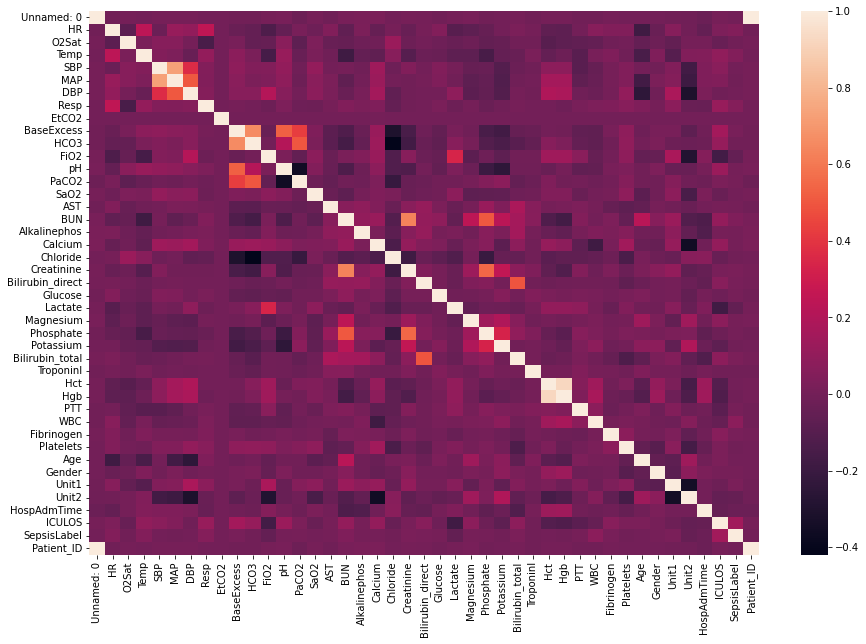

In [ ]:
plt.figure(figsize=(15, 10))
corr = df.corr()
sns.heatmap(corr, annot_kws={"size": 7})

## Checking for Missing lab data



<AxesSubplot:>

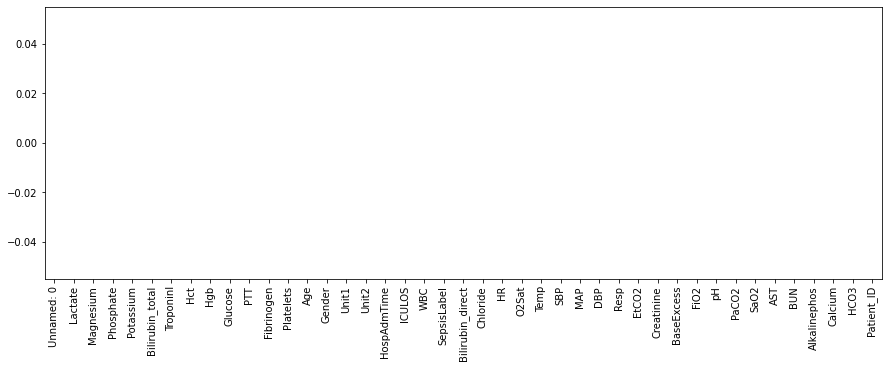

In [ ]:
round((df.isna().sum().sort_values()/len(df)*100)).plot.bar(figsize=(15,5))

# Feature Engineering

## Quick SOFA (qSOFA) Score

In [ ]:
def get_qSOFA(row):
    
    gender = row['Gender']
    age = row['Age']
    qSOFA = 0
    diff = 0
    
    respiratoryRate = float(row['Resp'])
    if(math.isnan(respiratoryRate) != True):
        if respiratoryRate >= 22:
            qSOFA += 1
           
    sbp = float(row['SBP'])
    if(math.isnan(sbp) != True) and sbp < 100:
            qSOFA += 1

    return qSOFA

In [ ]:
get_qSOFA(df.loc[0])

1

In [ ]:
condition_resp=(df['Resp']>22)
condition_sbp=(df['SBP']<100)

df['qSOFA']=np.where(condition_resp, 1, 0)+np.where(condition_sbp, 1, 0)


In [ ]:
df['qSOFA'].value_counts()

0    526000
1    238468
2     25747
Name: qSOFA, dtype: int64

<AxesSubplot:>

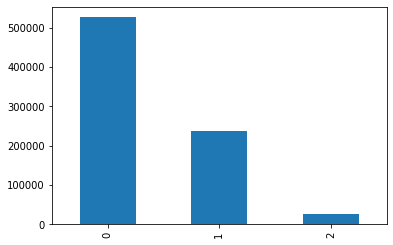

In [ ]:
df['qSOFA'].value_counts().plot.bar()

0    564344
1    182833
2     14818
Name: qSOFA, dtype: int64


<AxesSubplot:>

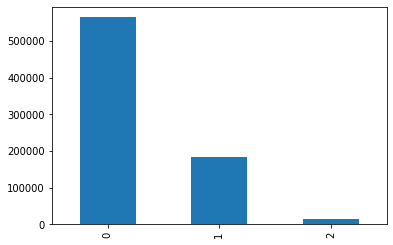

In [ ]:
condition_resp=(df_test['Resp']>22)
condition_sbp=(df_test['SBP']<100)
df_test['qSOFA']=np.where(condition_resp, 1, 0)+np.where(condition_sbp, 1, 0)
print(df_test['qSOFA'].value_counts())
df_test['qSOFA'].value_counts().plot.bar()

## T-Suspicion Score - SEWS

0 - Low Risk
1 - Intermediate Risk
2 - High Risk

In [ ]:
# Heartrate
# Children (3-12 years old): 70-140 beats per minute
# Teenagers (12-18 years old): 60-100 beats per minute
    
# Respiratory rate
# Children (3-12 years old): 22-34 breaths per minute
# Teenagers (12-18 years old): 16-30 breaths per minute
 
# Temperature
# 36.5°C and 37.5°C (97.7°F and 99.5°F)

# BP range
# Age	                    Normal Systolic Range	Normal Diastolic Range
# Older child (1–13 years)	80–120 mm Hg	45–80 mm Hg
# Adolescent  (14–18 years)	90–120 mm Hg	50–80 mm Hg
# Adult       (19–40 years)	95–135 mm Hg	60–80 mm Hg

# Oxygen Saturation
# normal levels ranging from about 95% to 100%.

# WBC range
# Adults: 4,500 to 11,000 cells per microliter (cells/uL) 4.5 - 11
# Children: 5,000 to 10,000 cells/uL 5 - 10

# Heart rate: 1 point for every 10 beats per minute above the normal range (e.g. a heart rate of 110 bpm would score 10 points)
# Respiratory rate: 1 point for every 10 breaths per minute above the normal range
# Temperature: 1 point for every degree Celsius above or below the normal range (e.g. a temperature of 38.5°C would score 1 point)
# Blood pressure: 1 point for every 10 mmHg below the normal range (e.g. a blood pressure of 90/60 mmHg would score 20 points)
# Oxygen saturation: 1 point for every 5% below the normal range (e.g. an oxygen saturation of 85% would score 15 points)
# White blood cell count: 1 point for every 1000 cells/mm³ above the normal range (e.g. a white blood cell count of 15,000 cells/mm³ would score 5 points)

def get_t_suspicion_score(row):
    
    gender = row['Gender']
    age = row['Age']
    sews = 0
    diff = 0
    
    heartRate = float(row['HR'])
    if(math.isnan(heartRate) != True):
        if age >= 1 and age <= 11 and heartRate > 140:
            diff = abs(heartRate-140)
            sews += int(diff/10)
        elif age >= 12 and age <= 150 and heartRate > 100:
            diff = abs(heartRate-100)
            sews += int(diff/10)
#         print("SEWS Heart Rate = ",int(diff/10))
        
    respiratoryRate = float(row['Resp'])
    if(math.isnan(respiratoryRate) != True):
        if age >= 1 and age <= 11 and respiratoryRate > 34:
            diff = abs(respiratoryRate-34)
            sews += int(diff/10)
        elif age >= 12 and age <= 150 and respiratoryRate > 30:
            diff = abs(respiratoryRate-30)
            sews += int(diff/10)
#         print("SEWS Respiratory Rate = ",int(diff/10))
        
    temperature = float(row['Temp'])
    if(math.isnan(temperature) != True):
        if temperature > 37.5:
            diff = abs(temperature-37.5)
            sews += int(diff)
        if temperature < 36.5:
            diff = abs(36.5-temperature)
            sews += int(diff)
#         print("SEWS Temperature = ",int(diff/10))
    #Doubtful, internet says if sepsis sbp falls below 100 then its an indicator    
    sbp = float(row['SBP'])
    if(math.isnan(sbp) != True) and sbp > 120:
        if age >= 1 and age <= 11:
            diff = abs(sbp-120)
            sews += int(diff/10)
        elif age >= 12 and age <= 17:
            diff = abs(sbp-120)
            sews += int(diff/10)
        elif age >= 18 and age <=150:
            diff = abs(sbp-120)
            sews += int(diff/10)
#         print("SEWS Systolic Blood Pressure = ",int(diff/10))
        
    dbp = float(row['DBP'])
    if(math.isnan(dbp) != True) and dbp > 80:
        if age >= 1 and age <= 17:
            diff = abs(dbp-80)
            sews += int(diff/10)
        elif age >= 18 and age <=150:
            diff = abs(dbp-80)
            sews += int(diff/10)
#         print("SEWS Diastolic Blood Pressure = ",int(diff/10))
        
    oxySat = float(row['O2Sat'])
    if(math.isnan(oxySat) != True) and oxySat < 95:
        diff = abs(95 - oxySat)
        sews += int(diff/5)
#         print("SEWS Oxygen Saturation = ",int(diff/10))
    
    wbc = float(row['WBC'])
    if(math.isnan(wbc) != True):
        if age >= 1 and age <= 11:
            #normal range 10
            if(wbc>10):
                diff = abs(wbc-10)
                sews += int(diff/10)
        elif age >= 12 and age <= 150:
            #normal 11
            if(wbc>11):
                diff = abs(wbc-11)
                sews += int(diff/10)
#         print("SEWS WBC = ",int(diff/10))
    
    #print("Sepsis Early Warning System Score = ", sews)
    if sews <= 3:
        return 0
    elif sews >=4 and sews <= 7:
        return 1
    else:
        return 2

In [ ]:
get_t_suspicion_score(df.loc[7])

0

In [ ]:
df['SEWS'] = 0

In [ ]:
for i in range(len(df)):
    df.loc[i ,['SEWS']] = get_t_suspicion_score(df.loc[i])

In [ ]:
df['SEWS'].value_counts()

0    717320
1     62841
2     10054
Name: SEWS, dtype: int64

<AxesSubplot:>

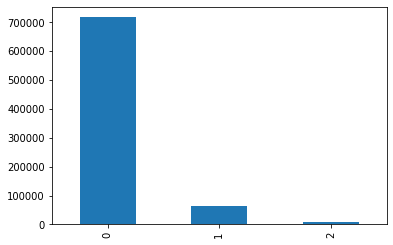

In [ ]:
df['SEWS'].value_counts().plot.bar()

0    615635
1    111227
2     35133
Name: SEWS, dtype: int64


<AxesSubplot:>

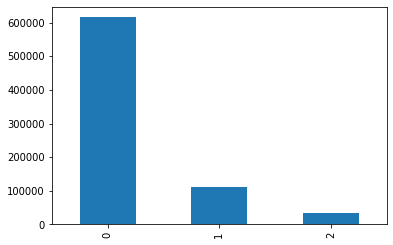

In [ ]:
df_test['SEWS'] = 0
for i in range(len(df_test)):
    df_test.loc[i ,['SEWS']] = get_t_suspicion_score(df_test.loc[i])
    
print(df_test['SEWS'].value_counts())
df_test['SEWS'].value_counts().plot.bar()

## SOFA Score

In [ ]:
def calculate_PaO2(row):
    overall_power = 1/3
    SaO2 = float(row['O2Sat'])
    x = 11700/((1/SaO2)-1)
    y = (50*3 + (x**2))*0.5
    value = (x+y)*(overall_power) + (x-y)*(overall_power)
    return math.ceil(value.real if type(value) == complex else value)

def get_platelets_score_sofa(row):
    platelet_count = float(row['Platelets'])
    if platelet_count > 149:
        return 0
    if platelet_count > 99:
        return 1
    if platelet_count > 49:
        return 2
    if platelet_count > 20:
        return 3
    return 4


def get_creatinine_score_sofa(row):
    creatinine = float(row['Creatinine'])
    if creatinine < 1.2:
        return 0
    if creatinine < 2:
        return 1
    if creatinine < 3.5:
        return 2
    if creatinine < 5:
        return 3
    return 4

def get_bilirubin_score_sofa(row):
    value = float(row['Bilirubin_total'])
    if value < 1.2:
        return 0
    if value < 2.0:
        return 1
    if value < 6.0:
        return 2
    if value < 12.0:
        return 3
    return 4


def get_MAP_score_sofa(row):
    value = float(row['MAP'])
    if value > 80 :
        return 1
    if value >70 and value <=80 :
        return 2
    if value >60 and value <=70 :
        return 3
    if value <=60:
        return 4

def get_GCS_alternative(row):
    hr = float(row['HR'])
    age = float(row['Age'])

    if age >0 and age <0.077 :
        gg_score=(hr-120)/120
        return gg_score
    if age >=0.077 and age <1 :
        gg_score=(hr-100)/100
        return gg_score
    if age >=1 and age <12 :
        gg_score=(hr-90)/90
        return gg_score
    if age >=12 and age <18 :
        gg_score=(hr-80)/80
        return gg_score
    if age >=18 :
        gg_score=(hr-60)/60
        return gg_score

def get_Glasgow():
    # Assuming that the patient is active from brain and its GCS coming to be 15, 
    # according to the formula, the value to be taken is 0
    return 0

def get_resp_score(row):
    o2sat = float(row['O2Sat'])
    fio2 = float(row['FiO2'])
    
    if fio2 < 0.1:
        return 4
    
    pao2 = calculate_PaO2(row)

    o2ratio = o2sat/fio2
    paratio = pao2/fio2
    
    if o2ratio > 302 or paratio > 400:
        return 0
    if paratio < 400 or o2ratio < 302:
        return 1
    if paratio < 300 or o2ratio < 221:
        return 2
    if paratio < 200 or o2ratio < 142:
        return 3
    if paratio < 100 or o2ratio < 67:
        return 4

def get_sofa_score(row):
    gcs = get_Glasgow()
    map_score = get_MAP_score_sofa(row)
    bilirubin = get_bilirubin_score_sofa(row)
    platelet = get_platelets_score_sofa(row)
    resp = get_resp_score(row)
    return gcs + resp + map_score + bilirubin + platelet

def rolling_difference(x):
    values = x.values
    if len(x) != 2:
        return 0
    diff = abs(values[1] - values[0])
    return 1 if diff >= 2 else 0

def sofa_change(df):
    grouped_df = df.groupby('Patient_ID')
    all_updated_dfs = []
    for patid, patdata in grouped_df:
        patdata['SOFA_Change'] = patdata['SOFA'].rolling(2, min_periods=1).apply(rolling_difference)
        all_updated_dfs.append(patdata)

    return pd.concat(all_updated_dfs)

In [ ]:
get_sofa_score(df.loc[0])

2

In [ ]:
df['SOFA'] = 0
for i in range(len(df)):
    df.loc[i ,['SOFA']] = get_sofa_score(df.loc[i])
len(df['SOFA'].unique())

In [ ]:
df_test['SOFA'] = 0
for i in range(len(df_test)):
    df_test.loc[i ,['SOFA']] = get_sofa_score(df_test.loc[i])
len(df_test['SOFA'].unique())

13

## SOFA Change

0.0    742988
1.0     47227
Name: SOFA_Change, dtype: int64


<AxesSubplot:>

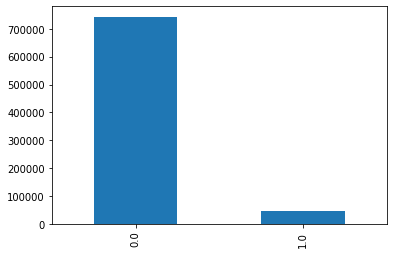

In [ ]:
df = sofa_change(df)
print(df['SOFA_Change'].value_counts())
df['SOFA_Change'].value_counts().plot.bar()

0.0    730677
1.0     31318
Name: SOFA_Change, dtype: int64


<AxesSubplot:>

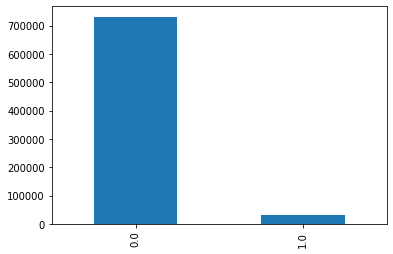

In [ ]:
df_test = sofa_change(df_test)
print(df_test['SOFA_Change'].value_counts())
df_test['SOFA_Change'].value_counts().plot.bar()

## SIRS

In [ ]:
condition_temp=(df['Temp']>38) |( df['Temp']<36)
condition_HR=(df['HR']>90)
condition_Resp=(df['Resp']>20) |( df['PaCO2']<32)
condition_wbc=(df['WBC']>12000) |( df['WBC']<4000)
df['SIRS_Score']=np.where(condition_temp, 1, 0)+np.where(condition_HR, 1, 0)+np.where(condition_Resp, 1, 0)+np.where(condition_wbc, 1, 0)


In [ ]:
df['SIRS_Score'].value_counts()

1    320034
2    299464
3    147435
4     23282
Name: SIRS_Score, dtype: int64

<AxesSubplot:>

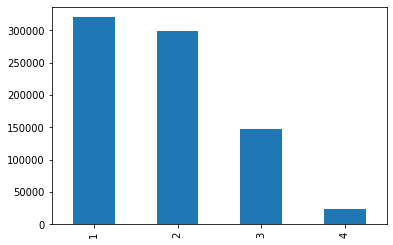

In [ ]:
df['SIRS_Score'].value_counts().plot.bar()

1    338303
2    288621
3    120290
4     14781
Name: SIRS_Score, dtype: int64


<AxesSubplot:>

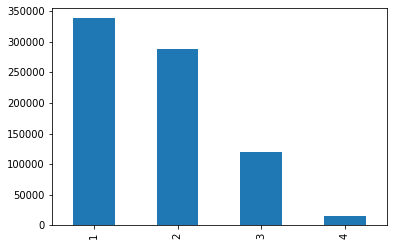

In [ ]:
condition_temp=(df_test['Temp']>38) |( df_test['Temp']<36)
condition_HR=(df_test['HR']>90)
condition_Resp=(df_test['Resp']>20) |( df_test['PaCO2']<32)
condition_wbc=(df_test['WBC']>12000) |( df_test['WBC']<4000)
df_test['SIRS_Score']=np.where(condition_temp, 1, 0)+np.where(condition_HR, 1, 0)+np.where(condition_Resp, 1, 0)+np.where(condition_wbc, 1, 0)
print(df_test['SIRS_Score'].value_counts())
df_test['SIRS_Score'].value_counts().plot.bar()



## Shock Index

In [ ]:
df['shock_index'] = df['HR']/df['SBP']
len(df['shock_index'].value_counts())

46787

In [ ]:
df_test['shock_index'] = df_test['HR']/df_test['SBP']
len(df_test['shock_index'].value_counts())

59622

## BUN/Creatinine

In [ ]:
df['BUN/Creatinine'] = df['BUN']/df['Creatinine']
len(df['BUN/Creatinine'].value_counts())

175867

In [ ]:
df_test['BUN/Creatinine'] = df_test['BUN']/df_test['Creatinine']
len(df_test['BUN/Creatinine'].value_counts())

281734

## Lactate t-1 window

In [ ]:
df['Lactate_t-1'] = df['Lactate'].diff(periods=1)

In [ ]:
df_test['Lactate_t-1'] = df_test['Lactate'].diff(periods=1)

## FiO2 t-1 window

In [ ]:
df['FiO2_t-1'] = df['FiO2'].diff(periods=1)

In [ ]:
df_test['FiO2_t-1'] = df_test['FiO2'].diff(periods=1)

## Difference feature

- HR
- MAP
- O2Sat
- SBP
- Resp

In [ ]:
df['HR_t-1'] = df['HR'].diff(periods=1)
df_test['HR_t-1'] = df_test['HR'].diff(periods=1)

In [ ]:
df['MAP_t-1'] = df['MAP'].diff(periods=1)
df_test['MAP_t-1'] = df_test['MAP'].diff(periods=1)

In [ ]:
df['O2Sat_t-1'] = df['O2Sat'].diff(periods=1)
df_test['O2Sat_t-1'] = df_test['O2Sat'].diff(periods=1)

In [ ]:
df['SBP_t-1'] = df['SBP'].diff(periods=1)
df_test['SBP_t-1'] = df_test['SBP'].diff(periods=1)

In [ ]:
df['Resp_t-1'] = df['Resp'].diff(periods=1)
df_test['Resp_t-1'] = df_test['Resp'].diff(periods=1)

## Sliding Window

In [ ]:
def rolling_df(df, cols, winsize):
    grouped_df = df.groupby('Patient_ID')
    new_dfs = []
    for patid, patdata in grouped_df:
        for col in cols:
            mean_col_name = col + "_mean"
            std_col_name = col + "_std"
            patdata[mean_col_name] = patdata[col].rolling(winsize, min_periods=1).mean()
            patdata[mean_col_name] = patdata[mean_col_name].bfill()
            patdata[std_col_name] = patdata[col].rolling(winsize, min_periods=1).std()
            patdata[std_col_name] = patdata[std_col_name].bfill()
        new_dfs.append(patdata)
    return pd.concat(new_dfs)

In [ ]:
training_df = rolling_df(df, ['HR', 'O2Sat', 'SBP', 'MAP', 'Resp'], 6)
testing_df = rolling_df(df_test, ['HR', 'O2Sat', 'SBP', 'MAP', 'Resp'], 6)

## Verifying train and test file for imputed and engineered values

In [ ]:
training_df.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID', 'qSOFA', 'SEWS',
       'SOFA', 'SOFA_Change', 'SIRS_Score', 'shock_index', 'BUN/Creatinine',
       'Lactate_t-1', 'FiO2_t-1', 'HR_t-1', 'MAP_t-1', 'O2Sat_t-1', 'SBP_t-1',
       'Resp_t-1', 'HR_mean', 'HR_std', 'O2Sat_mean', 'O2Sat_std', 'SBP_mean',
       'SBP_std', 'MAP_mean', 'MAP_std', 'Resp_mean', 'Resp_std'],
      dtype='object')

In [ ]:
testing_df.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID', 'qSOFA', 'SEWS',
       'SOFA', 'SOFA_Change', 'SIRS_Score', 'shock_index', 'BUN/Creatinine',
       'Lactate_t-1', 'FiO2_t-1', 'HR_t-1', 'MAP_t-1', 'O2Sat_t-1', 'SBP_t-1',
       'Resp_t-1', 'HR_mean', 'HR_std', 'O2Sat_mean', 'O2Sat_std', 'SBP_mean',
       'SBP_std', 'MAP_mean', 'MAP_std', 'Resp_mean', 'Resp_std'],
      dtype='object')

In [ ]:
df.isna().sum().sort_values(ascending=False)

Resp_t-1            1
SBP_t-1             1
O2Sat_t-1           1
MAP_t-1             1
HR_t-1              1
FiO2_t-1            1
Lactate_t-1         1
Age                 0
Unit2               0
Unit1               0
Gender              0
PTT                 0
Platelets           0
Fibrinogen          0
WBC                 0
ICULOS              0
HospAdmTime         0
qSOFA               0
SepsisLabel         0
Patient_ID          0
O2Sat               0
SEWS                0
SOFA                0
SOFA_Change         0
SIRS_Score          0
shock_index         0
BUN/Creatinine      0
Hgb                 0
HR                  0
TroponinI           0
SaO2                0
Temp                0
SBP                 0
MAP                 0
DBP                 0
Resp                0
EtCO2               0
BaseExcess          0
HCO3                0
FiO2                0
pH                  0
PaCO2               0
AST                 0
Bilirubin_total     0
BUN                 0
Alkalineph

In [ ]:
training_df.head(10)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,qSOFA,SEWS,SOFA,SOFA_Change,SIRS_Score,shock_index,BUN/Creatinine,Lactate_t-1,FiO2_t-1,HR_t-1,MAP_t-1,O2Sat_t-1,SBP_t-1,Resp_t-1,HR_mean,HR_std,O2Sat_mean,O2Sat_std,SBP_mean,SBP_std,MAP_mean,MAP_std,Resp_mean,Resp_std
0,97.0,95.0,36.110,98.0,75.330,71.0,19.0,43.87,24.000000,45.0,0.2800,7.360000,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,0.97,193.0,18.04,2.0,3.3,3.8,0.3,0.02,37.2,12.5,65.17,5.7,210.33,317.0,83.14,0.0,0.0,0.0,-0.03,1.0,0.0,1.0,1,0,2,0.0,2,0.989796,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,0.000000,95.000000,0.000000,98.000000,0.000000,75.330000,0.000000,19.000000,0.000000
1,97.0,95.0,36.110,98.0,75.330,69.0,19.0,35.01,24.000000,45.0,0.2800,7.360000,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,0.46,193.0,15.35,2.0,3.3,3.8,0.3,0.01,37.2,12.5,68.42,5.7,239.49,317.0,83.14,0.0,0.0,0.0,-0.03,2.0,0.0,1.0,1,0,2,0.0,2,0.989796,20.0,-2.69,0.0000,0.0,0.000,0.0,0.0,0.0,97.000000,0.000000,95.000000,0.000000,98.000000,0.000000,75.330000,0.000000,19.000000,0.000000
2,89.0,99.0,36.110,122.0,86.000,62.0,22.0,44.65,24.000000,45.0,0.2800,7.360000,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,0.33,193.0,5.08,2.0,3.3,3.8,0.3,0.01,37.2,12.5,67.20,5.7,387.24,317.0,83.14,0.0,0.0,0.0,-0.03,3.0,0.0,1.0,0,0,1,0.0,2,0.729508,20.0,-10.27,0.0000,-8.0,10.670,4.0,24.0,3.0,94.333333,4.618802,96.333333,2.309401,106.000000,13.856406,78.886667,6.160327,20.000000,1.732051
3,90.0,95.0,36.110,122.0,88.665,61.0,30.0,39.69,24.000000,45.0,0.2800,7.360000,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,0.22,193.0,17.83,2.0,3.3,3.8,0.3,0.04,37.2,12.5,62.68,5.7,320.88,317.0,83.14,0.0,0.0,0.0,-0.03,4.0,0.0,1.0,1,0,1,0.0,2,0.737705,20.0,12.75,0.0000,1.0,2.665,-4.0,0.0,8.0,93.250000,4.349329,96.000000,2.000000,110.000000,13.856406,81.331250,7.014535,22.500000,5.196152
4,103.0,88.5,36.110,122.0,91.330,78.0,24.5,35.80,23.857143,45.0,0.2800,7.365714,98.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,0.87,193.0,18.11,2.0,3.3,3.8,0.3,0.01,37.2,12.5,69.38,5.7,324.00,317.0,83.14,0.0,0.0,0.0,-0.03,5.0,0.0,1.0,1,0,1,0.0,3,0.844262,20.0,0.28,0.0000,13.0,2.665,-6.5,0.0,-5.5,95.200000,5.761944,94.500000,3.774917,112.400000,13.145341,83.331000,7.543062,22.900000,4.588028
5,110.0,91.0,36.110,122.5,84.165,68.0,22.0,36.43,23.714286,45.0,0.2805,7.371429,96.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,0.95,193.0,10.70,2.0,3.3,3.8,0.3,0.03,37.2,12.5,69.86,5.7,272.10,317.0,83.14,0.0,0.0,0.0,-0.03,6.0,0.0,1.0,0,0,1,0.0,3,0.897959,20.0,-7.41,0.0005,7.0,-7.165,2.5,0.5,-2.5,97.666667,7.941452,93.916667,3.666288,114.083333,12.459601,83.470000,6.755305,22.750000,4.120073
6,108.0,92.0,36.110,123.0,77.000,69.0,29.0,44.52,23.571429,45.0,0.2810,7.377143,94.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,0.84,193.0,16.65,2.0,3.3,3.8,0.3,0.00,37.2,12.5,64.83,5.7,291.99,317.0,83.14,0.0,0.0,0.0,-0.03,7.0,0.0,1.0,1,0,2,0.0,3,0.878049,20.0,5.95,0.0005,-2.0,-7.165,1.0,0.5,7.0,99.500000,8.961027,93.416667,3.693463,118.250000,9.928494,83.748333,6.376633,24.416667,4.317600
7,106.0,90.5,36.375,93.0,76.330,65.0,29.0,41.47,23.428571,45.0,0.2815,7.382857,92.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,1.06,193.0,5.27,2.0,3.3,3.8,0.3,0.03,37.2,12.5,61.06,5.7,395.54,317.0,83.14,0.0,0.0,0.0,-0.03,8.0,0.0,1.0,2,0,2,0.0,3,1.139785,20.0,-11.38,0.0005,-2.0,-0.670,-1.5,-30.0,0.0,101.000000,9.208692,92.666667,3.763863,117.416667,11.968361,83.915000,6.120521,26.083333,3.693463
8,104.0,95.0,36.640,133.0,88.330,75.0,26.0,43.31,23.285714,45.0,0.2820,7.388571,90.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,0.46,193.0,6.67,2.0,3.3,3.8,0.3,0.02,37.2,12.5,67.47,5.7,288.93,317.0,83.14,0.0,0.0,0.0,-0.03,9.0,0.0,1.0,1,0,1,0.0,3,0.781955,20.0,1.40,0.0005,-2.0,12.000,4.5,40.0,-3.0,103.500000,7.092249,92.000000,2.588436,119.250000,13.548985,84.303333,6.348922,26.750000,3.126500
9,102.0,91.0,36.905

In [ ]:
testing_df.head(10)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,qSOFA,SEWS,SOFA,SOFA_Change,SIRS_Score,shock_index,BUN/Creatinine,Lactate_t-1,FiO2_t-1,HR_t-1,MAP_t-1,O2Sat_t-1,SBP_t-1,Resp_t-1,HR_mean,HR_std,O2Sat_mean,O2Sat_std,SBP_mean,SBP_std,MAP_mean,MAP_std,Resp_mean,Resp_std
0,93.00,92.5,36.500,110.0,76.0,56.0,22.0,39.69,0.30,25.37,21.0,7.41,42.28,94.95,8.35,30.0,102.62,7.8,104.97,1.5,1.12,233.0,9.69,2.10,3.88,3.7,0.91,0.03,35.3,11.3,67.11,10.8,205.30,170.0,73.0,1.0,1.0,0.0,-214.64,1.0,0.0,100001.0,0,0,3,0.0,3,0.845455,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.000000,0.000000,92.500000,0.000000,110.000000,0.000000,76.000000,0.000000,22.000000,0.000000
1,93.00,92.5,36.500,110.0,76.0,56.0,22.0,37.44,0.98,24.30,21.0,7.39,38.12,94.61,31.67,30.0,141.12,7.8,101.77,1.5,0.60,233.0,8.67,2.10,3.28,3.7,0.42,0.02,35.3,11.3,61.98,10.8,341.04,170.0,73.0,1.0,1.0,0.0,-214.64,2.0,0.0,100001.0,0,0,3,0.0,3,0.845455,20.0,-1.02,0.0,0.00,0.0,0.0,0.0,0.0,93.000000,0.000000,92.500000,0.000000,110.000000,0.000000,76.000000,0.000000,22.000000,0.000000
2,91.00,96.0,36.500,108.0,84.5,72.0,23.5,38.41,1.64,25.36,21.0,7.40,40.60,96.65,43.44,30.0,91.64,7.8,96.86,1.5,0.72,233.0,5.73,2.10,3.44,3.7,0.77,0.01,35.3,11.3,68.04,10.8,329.98,170.0,73.0,1.0,1.0,0.0,-214.64,3.0,0.0,100001.0,1,0,2,0.0,3,0.842593,20.0,-2.94,0.0,-2.00,8.5,3.5,-2.0,1.5,92.333333,1.154701,93.666667,2.020726,109.333333,1.154701,78.833333,4.907477,22.500000,0.866025
3,93.00,98.0,36.500,123.0,87.0,61.0,21.0,37.75,-1.45,23.84,21.0,7.43,41.59,97.80,38.32,30.0,97.15,7.8,105.68,1.5,0.52,217.2,11.09,2.10,3.44,3.7,0.35,0.01,35.3,11.3,63.67,10.8,295.06,170.0,73.0,1.0,1.0,0.0,-214.64,4.0,0.0,100001.0,0,0,2,0.0,3,0.756098,20.0,5.36,0.0,2.00,2.5,2.0,15.0,-2.5,92.500000,1.000000,94.750000,2.723356,112.750000,6.898067,80.875000,5.720941,22.125000,1.030776
4,93.00,95.0,36.500,110.0,81.0,70.0,20.0,43.44,-1.57,25.85,21.0,7.41,37.96,97.57,33.24,30.0,64.76,7.8,97.69,1.5,0.84,201.4,17.09,2.10,3.48,3.7,0.62,0.00,35.3,11.3,63.17,10.8,370.44,170.0,73.0,1.0,1.0,0.0,-214.64,5.0,0.0,100001.0,0,0,2,0.0,2,0.845455,20.0,6.00,0.0,0.00,-6.0,-3.0,-13.0,-1.0,92.600000,0.894427,94.800000,2.361144,112.200000,6.099180,80.900000,4.954796,21.700000,1.303840
5,92.25,96.0,36.500,107.0,78.0,65.0,20.0,43.55,-1.08,25.61,21.0,7.43,40.94,98.25,40.55,30.0,66.65,7.8,104.03,1.5,0.54,185.6,12.76,2.10,2.72,3.7,0.78,0.04,35.3,11.3,62.26,10.8,290.17,170.0,73.0,1.0,1.0,0.0,-214.64,6.0,0.0,100001.0,0,0,3,0.0,2,0.862150,20.0,-4.33,0.0,-0.75,-3.0,1.0,-3.0,0.0,92.541667,0.812660,95.000000,2.167948,111.333333,5.853774,80.416667,4.587120,21.416667,1.357080
6,91.50,97.0,36.500,104.0,75.0,60.0,20.0,38.46,1.27,24.75,21.0,7.44,42.66,97.53,28.72,30.0,64.02,7.8,101.83,1.5,1.02,169.8,14.35,2.10,3.64,3.7,0.63,0.01,35.3,11.3,61.86,10.8,275.06,170.0,73.0,1.0,1.0,0.0,-214.64,7.0,0.0,100001.0,0,0,3,0.0,2,0.879808,20.0,1.59,0.0,-0.75,-3.0,1.0,-3.0,0.0,92.291667,0.872019,95.750000,1.890767,110.333333,6.592926,80.250000,4.793224,21.083333,1.428869
7,94.00,95.0,36.575,114.0,85.0,66.0,20.0,41.50,1.86,22.11,21.0,7.44,42.54,94.19,21.69,30.0,131.91,7.8,97.10,1.5,0.73,154.0,12.39,2.10,3.23,3.7,0.59,0.03,35.3,11.3,64.38,10.8,390.07,170.0,73.0,1.0,1.0,0.0,-214.64,8.0,0.0,100001.0,0,0,2,0.0,2,0.824561,20.0,-1.96,0.0,2.50,10.0,-2.0,10.0,0.0,92.458333,1.100189,96.166667,1.169045,111.000000,6.752777,81.750000,4.601630,20.750000,1.405347
8,94.00,95.0,36.650,121.0,88.0,69.0,20.0,41.39,-1.91,27.12,21.0,7.42,35.95,98.30,15.57,30.0,69.45,7.8,101.28,1.5,0.58,145.6,11.33,2.08,2.56,3.8,0.96,0.01,35.3,11.3,68.93,10.8,397.99,170.0,73.0,1.0,1.0,0.0,-214.64,9.0,0.0,100001.0,0,0,2,0.0,2,0.776860,20.0,-1.06,0.0,0.00,3.0,0.0,7.0,0.0,92.958333,0.980009,96.000000,1.264911,113.166667,7.626707,82.333333,5.202563,20.166667,0.408248
9,102.00,95.0,36.72

In [ ]:
training_df = training_df.fillna(0)
testing_df = testing_df.fillna(0)

In [ ]:
training_df.isna().sum().sort_values(ascending=False)

HR             0
Lactate_t-1    0
Gender         0
Unit1          0
Unit2          0
              ..
TroponinI      0
Hct            0
Hgb            0
PTT            0
Resp_std       0
Length: 66, dtype: int64

In [ ]:
testing_df.isna().sum().sort_values(ascending=False)

HR             0
Lactate_t-1    0
Gender         0
Unit1          0
Unit2          0
              ..
TroponinI      0
Hct            0
Hgb            0
PTT            0
Resp_std       0
Length: 66, dtype: int64

## Saving file - Imputation and feature engineering done

In [ ]:
training_df.to_csv('training_imputed_engineered.csv')
testing_df.to_csv('testing_imputed_engineered.csv')

# Reading Files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [102]:
# df_train = pd.read_csv('training_imputed_engineered.csv')
# df_test = pd.read_csv('testing_imputed_engineered.csv')

# Rajeshwari
df_train = pd.read_csv('/content/drive/MyDrive/training_imputed_engineered.csv', index_col=0)
df_test = pd.read_csv('/content/drive/MyDrive/testing_imputed_engineered.csv', index_col=0)


In [116]:
df_test_imputed = pd.read_csv('/content/drive/MyDrive/testing_imputed_v2.csv', index_col=0)
df_train_imputed = pd.read_csv('/content/drive/MyDrive/training_imputed_v2.csv', index_col=0)

In [ ]:
df_train.head(20)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,qSOFA,SEWS,SOFA,SOFA_Change,SIRS_Score,shock_index,BUN/Creatinine,Lactate_t-1,FiO2_t-1,HR_t-1,MAP_t-1,O2Sat_t-1,SBP_t-1,Resp_t-1,HR_mean,HR_std,O2Sat_mean,O2Sat_std,SBP_mean,SBP_std,MAP_mean,MAP_std,Resp_mean,Resp_std
0,93.00,92.50,36.50,110.00,76.00,56.00,22.00,39.69,0.30,25.37,21.00,7.41,42.28,94.95,8.35,30.00,102.62,7.80,104.97,1.50,1.12,233.00,9.69,2.10,3.88,3.70,0.91,0.03,35.30,11.30,67.11,10.80,205.30,170.00,73.00,1.00,1.00,0.00,-214.64,1.00,0.00,"100,001.00",0,0,3,0.00,3,0.85,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,93.00,0.00,92.50,0.00,110.00,0.00,76.00,0.00,22.00,0.00
1,93.00,92.50,36.50,110.00,76.00,56.00,22.00,37.44,0.98,24.30,21.00,7.39,38.12,94.61,31.67,30.00,141.12,7.80,101.77,1.50,0.60,233.00,8.67,2.10,3.28,3.70,0.42,0.02,35.30,11.30,61.98,10.80,341.04,170.00,73.00,1.00,1.00,0.00,-214.64,2.00,0.00,"100,001.00",0,0,3,0.00,3,0.85,20.00,-1.02,0.00,0.00,0.00,0.00,0.00,0.00,93.00,0.00,92.50,0.00,110.00,0.00,76.00,0.00,22.00,0.00
2,91.00,96.00,36.50,108.00,84.50,72.00,23.50,38.41,1.64,25.36,21.00,7.40,40.60,96.65,43.44,30.00,91.64,7.80,96.86,1.50,0.72,233.00,5.73,2.10,3.44,3.70,0.77,0.01,35.30,11.30,68.04,10.80,329.98,170.00,73.00,1.00,1.00,0.00,-214.64,3.00,0.00,"100,001.00",1,0,2,0.00,3,0.84,20.00,-2.94,0.00,-2.00,8.50,3.50,-2.00,1.50,92.33,1.15,93.67,2.02,109.33,1.15,78.83,4.91,22.50,0.87
3,93.00,98.00,36.50,123.00,87.00,61.00,21.00,37.75,-1.45,23.84,21.00,7.43,41.59,97.80,38.32,30.00,97.15,7.80,105.68,1.50,0.52,217.20,11.09,2.10,3.44,3.70,0.35,0.01,35.30,11.30,63.67,10.80,295.06,170.00,73.00,1.00,1.00,0.00,-214.64,4.00,0.00,"100,001.00",0,0,2,0.00,3,0.76,20.00,5.36,0.00,2.00,2.50,2.00,15.00,-2.50,92.50,1.00,94.75,2.72,112.75,6.90,80.88,5.72,22.12,1.03
4,93.00,95.00,36.50,110.00,81.00,70.00,20.00,43.44,-1.57,25.85,21.00,7.41,37.96,97.57,33.24,30.00,64.76,7.80,97.69,1.50,0.84,201.40,17.09,2.10,3.48,3.70,0.62,0.00,35.30,11.30,63.17,10.80,370.44,170.00,73.00,1.00,1.00,0.00,-214.64,5.00,0.00,"100,001.00",0,0,2,0.00,2,0.85,20.00,6.00,0.00,0.00,-6.00,-3.00,-13.00,-1.00,92.60,0.89,94.80,2.36,112.20,6.10,80.90,4.95,21.70,1.30
5,92.25,96.00,36.50,107.00,78.00,65.00,20.00,43.55,-1.08,25.61,21.00,7.43,40.94,98.25,40.55,30.00,66.65,7.80,104.03,1.50,0.54,185.60,12.76,2.10,2.72,3.70,0.78,0.04,35.30,11.30,62.26,10.80,290.17,170.00,73.00,1.00,1.00,0.00,-214.64,6.00,0.00,"100,001.00",0,0,3,0.00,2,0.86,20.00,-4.33,0.00,-0.75,-3.00,1.00,-3.00,0.00,92.54,0.81,95.00,2.17,111.33,5.85,80.42,4.59,21.42,1.36
6,91.50,97.00,36.50,104.00,75.00,60.00,20.00,38.46,1.27,24.75,21.00,7.44,42.66,97.53,28.72,30.00,64.02,7.80,101.83,1.50,1.02,169.80,14.35,2.10,3.64,3.70,0.63,0.01,35.30,11.30,61.86,10.80,275.06,170.00,73.00,1.00,1.00,0.00,-214.64,7.00,0.00,"100,001.00",0,0,3,0.00,2,0.88,20.00,1.59,0.00,-0.75,-3.00,1.00,-3.00,0.00,92.29,0.87,95.75,1.89,110.33,6.59,80.25,4.79,21.08,1.43
7,94.00,95.00,36.58,114.00,85.00,66.00,20.00,41.50,1.86,22.11,21.00,7.44,42.54,94.19,21.69,30.00,131.91,7.80,97.10,1.50,0.73,154.00,12.39,2.10,3.23,3.70,0.59,0.03,35.30,11.30,64.38,10.80,390.07,170.00,73.00,1.00,1.00,0.00,-214.64,8.00,0.00,"100,001.00",0,0,2,0.00,2,0.82,20.00,-1.96,0.00,2.50,10.00,-2.00,10.00,0.00,92.46,1.10,96.17,1.17,111.00,6.75,81.75,4.60,20.75,1.41
8,94.00,95.00,36.65,121.00,88.00,69.00,20.00,41.39,-1.91,27.12,21.00,7.42,35.95,98.30,15.57,30.00,69.45,7.80,101.28,1.50,0.58,145.60,11.33,2.08,2.56,3.80,0.96,0.01,35.30,11.30,68.93,10.80,397.99,170.00,73.00,1.00,1.00,0.00,-214.64,9.00,0.00,"100,001.00",0,0,2,0.00,2,0.78,20.00,-1.06,0.00,0.00,3.00,0.00,7.00,0.00,92.96,0.98,96.00,1.26,113.17,7.63,82.33,5.20,20.17,0.41
9,102.00,95.00,36.73,117.00,89.00,70.00,20.00,39.89,-0.91,25.50,21.00,7.44,43.41,96.14,8.19,30.00,136.60,7.80,101.97,1.50,1.05,137.20,

In [ ]:
df_train.isnull().sum().sort_values(ascending = False)

HR             0
Lactate_t-1    0
Gender         0
Unit1          0
Unit2          0
              ..
TroponinI      0
Hct            0
Hgb            0
PTT            0
Resp_std       0
Length: 66, dtype: int64

In [18]:
df_train.columns

Index(['Unnamed: 0.1', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'HCO3', 'FiO2',
       'pH', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Creatinine', 'Glucose',
       'Lactate', 'Magnesium', 'Potassium', 'Bilirubin_total', 'Hgb', 'PTT',
       'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender', 'HospAdmTime',
       'ICULOS', 'SepsisLabel', 'Patient_ID', 'Unit'],
      dtype='object')

In [ ]:
# list out lab test features for imputation
labs=['BaseExcess','HCO3','FiO2','pH','PaCO2','SaO2','AST','BUN','Alkalinephos','Calcium','Chloride','Creatinine','Bilirubin_direct','Glucose','Lactate',
      'Magnesium','Phosphate','Potassium','Bilirubin_total','TroponinI','Hct','Hgb','PTT','WBC','Fibrinogen','Platelets']

# list out vital signal features for imputation
vitals = ['HR','O2Sat','Temp','SBP','MAP','DBP','Resp','EtCO2']

# list out demographic features for imputation
demogs = ['Age','Gender','Unit1','Unit2','HospAdmTime','ICULOS']

# labels
labels = ['SepsisLabel']

important_features = ['PaCO2','FiO2','Unit2','SIRS_Score','ICULOS','SOFA','Temp','Calcium','Resp','BUN','Unit1','DBP','WBC','EtCO2','SBP_std','qSOFA']

In [104]:
training_features = ['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'HCO3', 'FiO2',
       'pH', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Creatinine', 'Glucose',
       'Lactate', 'Magnesium', 'Potassium', 'Bilirubin_total', 'Hgb', 'PTT',
       'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender', 'HospAdmTime',
       'ICULOS','qSOFA', 'SEWS', 'SOFA', 'SOFA_Change', 'SIRS_Score', 'shock_index', 'Creatinine','BUN/Creatinine',
       'Lactate_t-1', 'FiO2_t-1', 'HR_t-1', 'MAP_t-1', 'O2Sat_t-1', 'SBP_t-1', 'Resp_t-1', 'HR_mean', 
       'HR_std', 'O2Sat_mean', 'O2Sat_std', 'SBP_mean', 'SBP_std', 'MAP_mean', 'MAP_std', 'Resp_mean', 'Resp_std']

training_features_imputed = ['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'HCO3', 'FiO2',
       'pH', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Creatinine', 'Glucose',
       'Lactate', 'Magnesium', 'Potassium', 'Bilirubin_total', 'Hgb', 'PTT',
       'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender', 'HospAdmTime',
       'ICULOS']


## Scaling the Dataset

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
X_train = df_train[training_features]
y_train = df_train['SepsisLabel']
X_train = scaler.fit_transform(X_train)

In [33]:
X_test = df_test[training_features]
y_test = df_test['SepsisLabel']
X_test = scaler.fit_transform(X_test)

In [36]:
X_train_imputed = df_train_imputed[training_features_imputed]
y_train_imputed = df_train_imputed['SepsisLabel']
X_train_imputed = scaler.fit_transform(X_train_imputed)

In [37]:
X_test_imputed = df_test_imputed[training_features_imputed]
y_test_imputed = df_test_imputed['SepsisLabel']
X_test_imputed = scaler.fit_transform(X_test_imputed)

## Downsample Data

In [105]:
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_train_ds, y_train_ds = under_sampler.fit_resample(X_train_imputed, y_train_imputed)
X_test_ds, y_test_ds = under_sampler.fit_resample(X_test_imputed, y_test_imputed)

## Accuracy measures

Some of the more common ones are:

Root Mean Squared (Percentage) Error

Mean Absolute (Percentage) Error

Capped Binomial Deviance

The AUC Metric

Normalized Gini Metrics

# Algorithms

## KNN

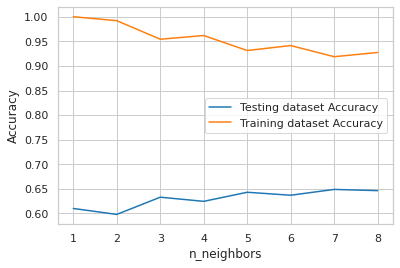

In [107]:
# Create feature and target arrays
# X_train = df_train[training_features]
# X_test = df_test[training_features]

# y_train = df_train['SepsisLabel']
# y_test = df_test['SepsisLabel']
  
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_ds, y_train_ds)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train_ds, y_train_ds)
    test_accuracy[i] = knn.score(X_test_ds, y_test_ds)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()


## Decision Tree

In [108]:
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):

    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy


# Function to make predictions
def prediction(X_test, clf_object):

    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):

    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))

    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)

    print("Report : ",
    classification_report(y_test, y_pred))

# Driver code
def main():

    # X_train = df_train[training_features]
    # X_test = df_test[training_features]

    # y_train = df_train['SepsisLabel']
    # y_test = df_test['SepsisLabel']

    clf_gini = train_using_gini(X_train_ds, X_test_ds, y_train_ds)
    clf_entropy = tarin_using_entropy(X_train_ds, X_test_ds, y_train_ds)

    # Operational Phase
    print("Results Using Gini Index:")

    # Prediction using gini
    y_pred_gini = prediction(X_test_ds, clf_gini)
    cal_accuracy(y_test_ds, y_pred_gini)

    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test_ds, clf_entropy)
    cal_accuracy(y_test_ds, y_pred_entropy)

# Calling main function
if __name__=="__main__":
	main()


Results Using Gini Index:
Predicted values:
[0. 1. 0. ... 0. 0. 0.]
Confusion Matrix:  [[8364 2416]
 [4293 6487]]
Accuracy :  68.88218923933209
Report :                precision    recall  f1-score   support

         0.0       0.66      0.78      0.71     10780
         1.0       0.73      0.60      0.66     10780

    accuracy                           0.69     21560
   macro avg       0.69      0.69      0.69     21560
weighted avg       0.69      0.69      0.69     21560

Results Using Entropy:
Predicted values:
[0. 1. 0. ... 0. 0. 0.]
Confusion Matrix:  [[8362 2418]
 [4293 6487]]
Accuracy :  68.87291280148423
Report :                precision    recall  f1-score   support

         0.0       0.66      0.78      0.71     10780
         1.0       0.73      0.60      0.66     10780

    accuracy                           0.69     21560
   macro avg       0.69      0.69      0.69     21560
weighted avg       0.69      0.69      0.69     21560



## Support Vector Machine

In [58]:
# X_train = df_train[training_features]
# X_test = df_test[training_features]

# y_train = df_train['SepsisLabel']
# y_test = df_test['SepsisLabel']


# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model
svc.fit(X_train_ds, y_train_ds)

# Make the predictions
y_predict = svc.predict(X_test_ds)
predictions = [round(value) for value in y_predict]

# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y_test_ds, y_predict))


# evaluate predictions
accuracy = accuracy_score(y_test_ds, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Mean Absolute Error:', mean_absolute_error(y_test_ds, y_predict))
print('Mean Squared Error:', mean_squared_error(y_test_ds, y_predict))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_ds, y_predict)))
print('F1 Score: ', f1_score(y_test_ds, y_predict))

Accuracy score 0.695
Accuracy: 69.53%
Mean Absolute Error: 0.3046846011131725
Mean Squared Error: 0.3046846011131725
Root Mean Squared Error: 0.5519824282648611
F1 Score:  0.6648298382570539


## Logistic Regression

In [109]:
# split data into train and test sets
# X_train = df_train[training_features]
# X_test = df_test[training_features]

# y_train = df_train['SepsisLabel']
# y_test = df_test['SepsisLabel']


#Implementing Logistic Regression using sklearn
modelLogistic = LogisticRegression()
modelLogistic.fit(X_train_ds,y_train_ds)

#print the regression coefficients
# print("The intercept b0= ", modelLogistic.intercept_)
# print("The coefficient b1= ", modelLogistic.coef_)

#Make prediction for the test data
y_pred= modelLogistic.predict(X_test_ds)
predictions = [round(value) for value in y_pred]

#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test_ds, y_pred)
# print(ConfusionMatrix)

#Accuracy from confusion matrix
TP= ConfusionMatrix[1,1] #True positive
TN= ConfusionMatrix[0,0] #True negative
Total=len(y_test_ds)
print("Accuracy from confusion matrix is ", (TN+TP)/Total)

# evaluate predictions
accuracy = accuracy_score(y_test_ds, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('F1 Score: ', f1_score(y_test_ds, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test_ds, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test_ds, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_ds, y_pred)))


Accuracy from confusion matrix is  0.6900278293135436
Accuracy: 69.00%
F1 Score:  0.6687484510532837
Mean Absolute Error: 0.3099721706864564
Mean Squared Error: 0.3099721706864564
Root Mean Squared Error: 0.5567514442607728


<StemContainer object of 3 artists>

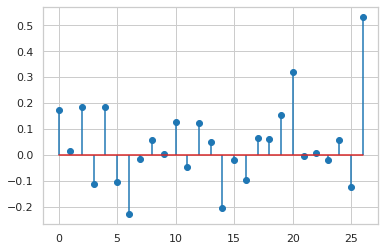

In [110]:
# Interpreting the Weight Vector
# Create a stem plot of the coefficients, W in the logistic regression model. The most significant features have larger values in the stem plot.

W = modelLogistic.coef_.ravel()
plt.stem(W, use_line_collection=True)

# From the stem plot, we see four significant features that are most involved in the prediction of Sepsis.

In [ ]:
# ind = np.argsort(np.abs(W))
# important_features = []
# for k in range(len(training_features)):
#     i = ind[-k]
#     name = training_features[:-2][i]
#     important_features.append(name)
#     print('The {0:d} most significant feature is {1:s}'.format(k, name))

## Naive Bayes

Gaussian Naïve Bayes

Multinomial Naïve Bayes

Bernoulli Naïve Bayes

In [111]:
classifer1 = GaussianNB()

from sklearn.model_selection import train_test_split

classifer1.fit(X_train_ds, y_train_ds)
y_pred1 = classifer1.predict(X_test_ds)


Accuracy :  0.6717532467532468
F1 Score:  0.6016324233042499
Mean Absolute Error: 0.32824675324675323
Mean Squared Error: 0.32824675324675323
Root Mean Squared Error: 0.5729282269593228
F1 Score:  0.6016324233042499
              precision    recall  f1-score   support

         0.0     0.6270    0.8478    0.7209     10780
         1.0     0.7651    0.4957    0.6016     10780

    accuracy                         0.6718     21560
   macro avg     0.6961    0.6718    0.6613     21560
weighted avg     0.6961    0.6718    0.6613     21560



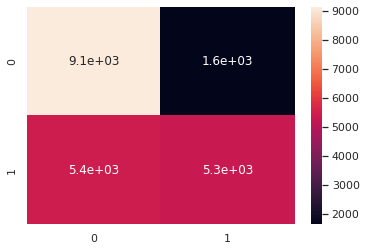

In [112]:
print("Accuracy : ", accuracy_score(y_test_ds,y_pred1))

cm = confusion_matrix(y_test_ds, y_pred1)
sns.heatmap(cm, annot=True)


print('F1 Score: ', f1_score(y_test_ds, y_pred1))
print('Mean Absolute Error:', mean_absolute_error(y_test_ds, y_pred1))
print('Mean Squared Error:', mean_squared_error(y_test_ds, y_pred1))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_ds, y_pred1)))
print('F1 Score: ', f1_score(y_test_ds, y_pred1))
print(classification_report(y_test_ds, y_pred1, digits=4))

## Random Forest

Accuracy: 68.92%
F1 Score:  0.6602788339670468
Mean Absolute Error: 0.4035746160496466
Mean Squared Error: 0.20652001785099813
Root Mean Squared Error: 0.4544447357501219
              precision    recall  f1-score   support

         0.0     0.6617    0.7743    0.7136     10780
         1.0     0.7280    0.6041    0.6603     10780

    accuracy                         0.6892     21560
   macro avg     0.6948    0.6892    0.6869     21560
weighted avg     0.6948    0.6892    0.6869     21560



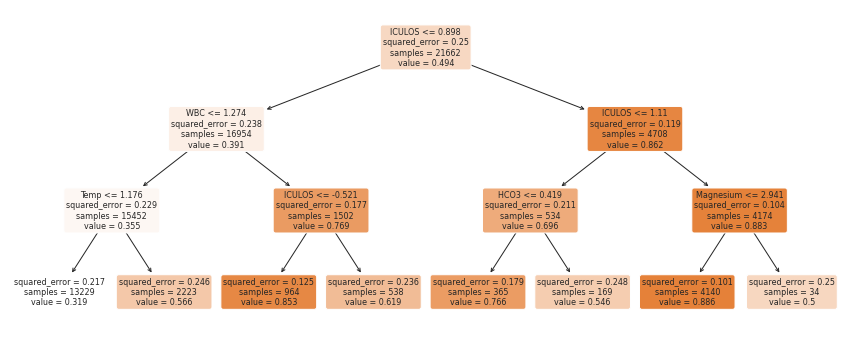

In [113]:
# X_train = df_train[training_features]
# X_test = df_test[training_features]

# y_train = df_train['SepsisLabel']
# y_test = df_test['SepsisLabel']

# from sklearn.model_selection import train_test_split

# SEED = 42
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, 
#                                                     test_size=0.2, 
#                                                     random_state=SEED)

SEED = 42
rfr = RandomForestRegressor(n_estimators=20, # 20 trees
                            max_depth=3, # 4 levels
                            random_state=SEED)

rfr.fit(X_train_ds, y_train_ds)
y_pred = rfr.predict(X_test_ds)
predictions = [round(value) for value in y_pred]


features = training_features

# Obtain just the first tree
first_tree = rfr.estimators_[0]

plt.figure(figsize=(15,6))
tree.plot_tree(first_tree,
               feature_names=features,
               fontsize=8, 
               filled=True, 
               rounded=True);

# evaluate predictions
accuracy = accuracy_score(y_test_ds, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('F1 Score: ', f1_score(y_test_ds, predictions))
print('Mean Absolute Error:', mean_absolute_error(y_test_ds, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test_ds, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_ds, y_pred)))
print(classification_report(y_test_ds, predictions, digits=4))

## XGBoost

In [114]:
# X_train = df_train[training_features]
# X_test = df_test[training_features]

# y_train = df_train['SepsisLabel']
# y_test = df_test['SepsisLabel']

# fit model no training data
# from sklearn.model_selection import train_test_split

# SEED = 42
# X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, 
#                                                     test_size=0.2, 
#     
                                                # random_state=SEED)
model = XGBClassifier()
model.fit(X_train_ds, y_train_ds)

# make predictions for test data
y_pred = model.predict(X_test_ds)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test_ds, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('F1 Score: ', f1_score(y_test_ds, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test_ds, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test_ds, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_ds, y_pred)))
print(classification_report(y_test_ds, y_pred, digits=4))


Accuracy: 66.45%
F1 Score:  0.575553077871017
Mean Absolute Error: 0.33548237476808906
Mean Squared Error: 0.33548237476808906
Root Mean Squared Error: 0.5792084035717101
              precision    recall  f1-score   support

         0.0     0.6159    0.8741    0.7227     10780
         1.0     0.7833    0.4549    0.5756     10780

    accuracy                         0.6645     21560
   macro avg     0.6996    0.6645    0.6491     21560
weighted avg     0.6996    0.6645    0.6491     21560



# Working with engineered features

## Random Forest with KFold Cross Validation

In [13]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# generate dataset
scores = ('f1', 'recall', 'precision','roc_auc')
# define model
model = RandomForestClassifier(n_estimators=10, class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1 Score: %.3f' % mean(scores))


Mean F1 Score: 0.476


In [ ]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('F1 Score: ', f1_score(y_test, predictions))
print(classification_report(y_test, predictions, digits=4))

# print('Mean ROC AUC: %.3f' % mean(scores))
# print('Mean f1: %.3f' % mean(scores['test_f1']))
# print('Mean recall: %.3f' % mean(scores['test_recall']))
# print('Mean precision: %.3f' % mean(scores['test_precision']))

## Different Random Forest Variations

In [53]:
###### Step 1: Install And Import Libraries
# Install the imbalanced learn library

# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Model and performance
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Ensembled sampling
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter
###### Step 2: Create Imbalanced Dataset
# Create an imbalanced dataset
X = X_train
y = y_train

###### Step 3: Train Test Split
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")
###### Step 4: Baseline Model
# Train the random forest model using the imbalanced dataset
rf = RandomForestClassifier()
baseline_model_cv = cross_validate(rf, X_train, y_train, cv = 5, n_jobs = -1, scoring="recall")
# Check the model performance
print(f"{baseline_model_cv['test_score'].mean():.3f} +/- {baseline_model_cv['test_score'].std():.3f}")
###### Step 5: Balanced Random Forest Classifier
# Train the balanced random forest model
brf = BalancedRandomForestClassifier(random_state=42)
brf_model_cv = cross_validate(brf, X_train, y_train, cv = 5, n_jobs = -1, scoring="recall")
# Check the model performance
print(f"{brf_model_cv['test_score'].mean():.3f} +/- {brf_model_cv['test_score'].std():.3f}")
###### Step 6: Random Under-Sampling Boosting Classifier
# Train the random under-sampling boosting classifier model
rusb = RUSBoostClassifier(random_state=42)
rusb_model_cv = cross_validate(rusb, X_train, y_train, cv = 5, n_jobs = -1, scoring="recall")
# Check the model performance
print(f"{rusb_model_cv['test_score'].mean():.3f} +/- {rusb_model_cv['test_score'].std():.3f}")
###### Step 7: Easy Ensemble Classifier for Ada Boost Classifier
# Train the easy ensemble classifier model
eec = EasyEnsembleClassifier(random_state=42)
eec_model_cv = cross_validate(eec, X_train, y_train, cv = 5, n_jobs = -1, scoring="recall")
# Check the model performance
print(f"{eec_model_cv['test_score'].mean():.3f} +/- {eec_model_cv['test_score'].std():.3f}")
###### Step 8: Balanced Bagging Classifier - Near Miss Under Sampling
# Train the balanced bagging classifier model using near miss under sampling
bbc_nm = BalancedBaggingClassifier(random_state=42, sampler=(NearMiss(version=3)))
bbc_nm_model_cv = cross_validate(bbc_nm, X_train, y_train, cv = 5, n_jobs = -1, scoring="recall")
# Check the model performance
print(f"{bbc_nm_model_cv['test_score'].mean():.3f} +/- {bbc_nm_model_cv['test_score'].std():.3f}")
###### Step 9: Balanced Bagging Classifier - SMOTE
# Train the balanced bagging classifier model using SMOTE
bbc_smote = BalancedBaggingClassifier(random_state=42, sampler=(SMOTE()))
bbc_smote_model_cv = cross_validate(bbc_smote, X_train, y_train, cv = 5, n_jobs = -1, scoring="recall")
# Check the model performance
print(f"{bbc_smote_model_cv['test_score'].mean():.3f} +/- {bbc_smote_model_cv['test_score'].std():.3f}")
###### Step 10: Use Best Model On Training Dataset
# Train the balanced random forest model
brf = BalancedRandomForestClassifier(random_state=42)
brf_model = brf.fit(X_train, y_train)
brf_prediction = brf_model.predict(X_test)
# Check the model performance
print(classification_report(y_test, brf_prediction))

The number of records in the training dataset is 404589
The number of records in the test dataset is 101148
The training dataset has 395771 records for the majority class and 8818 records for the minority class.
0.444 +/- 0.018
0.941 +/- 0.006
0.683 +/- 0.014
nan +/- nan
nan +/- nan
nan +/- nan
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95     98954
         1.0       0.17      0.95      0.29      2194

    accuracy                           0.90    101148
   macro avg       0.59      0.93      0.62    101148
weighted avg       0.98      0.90      0.93    101148



# Bagging and Cross Validation

## Random Forest Classfier

In [55]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=RandomForestClassifier(class_weight='balanced'), 
    n_estimators=10, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
# bag_model.fit(X_train, y_train)
# bag_model.oob_score_

scores_bagging_model = cross_val_score(bag_model,X_train, y_train,cv=5,scoring='f1')
print(mean(scores_bagging_model))

0.9814948008967125

In [56]:
y_pred = bag_model.predict(X_test)
predictions = [round(value) for value in y_pred]
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('F1 Score: ', f1_score(y_test, predictions))
print(classification_report(y_test, predictions, digits=4))

Mean Absolute Error: 0.018695377071222367
Mean Squared Error: 0.018695377071222367
Root Mean Squared Error: 0.1367310391652984
F1 Score:  0.25697445972495087
              precision    recall  f1-score   support

         0.0     0.9815    0.9998    0.9905     98954
         1.0     0.9316    0.1490    0.2570      2194

    accuracy                         0.9813    101148
   macro avg     0.9566    0.5744    0.6238    101148
weighted avg     0.9804    0.9813    0.9746    101148



## Engineered feature using bagging and scoring model on test data




In [25]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=RandomForestClassifier(class_weight='balanced'), 
    n_estimators=10, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.98118360193112

In [26]:
#Return the mean accuracy on the given test data and labels.
bag_model.score(X_test, y_test)

0.9858529255441308

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
evaluate(bag_model, X_train, X_test, y_train, y_test)

## Imputed feature using bagging and scoring model on test data

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=RandomForestClassifier(class_weight='balanced'), 
    n_estimators=10, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train_imputed, y_train_imputed)
bag_model.oob_score_

In [ ]:
bag_model.score(X_test_imputed, y_test_imputed)

In [ ]:
evaluate(bag_model, X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed)

## Support Vector Machine

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

scores = cross_val_score(SVC(class_weight='balanced'), X, y, cv=5, scoring='f1')
scores.mean()

## Decision Tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

scores = cross_val_score(DecisionTreeClassifier(class_weight='balanced'), X, y, cv=5, scoring='f1')
scores.mean()

## XGBoost

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

scores = cross_val_score(XGBClassifier(class_weight='balanced'), X, y, cv=5, scoring='f1')
scores.mean()